# (Prosper Loan Data Exploration )
## by (Rania Hasan)

## Preliminary Wrangling

> This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline



In [2]:
# load in the dataset into a pandas dataframe, print statistics
Loan_df= pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(Loan_df.shape)
print(Loan_df.dtypes)
print(Loan_df.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
#supset the data fram to choose a appropriate columns
loan_feature_df = Loan_df[['ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', \
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', \
            'IncomeVerifiable', 'LoanOriginalAmount', 'LoanStatus']]


In [5]:
#explor the appropriate columns
loan_feature_df.shape
loan_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ProsperScore               84853 non-null   float64
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   EmploymentStatus           111682 non-null  object 
 3   EmploymentStatusDuration   106312 non-null  float64
 4   IsBorrowerHomeowner        113937 non-null  bool   
 5   CurrentCreditLines         106333 non-null  float64
 6   OpenRevolvingAccounts      113937 non-null  int64  
 7   DebtToIncomeRatio          105383 non-null  float64
 8   IncomeVerifiable           113937 non-null  bool   
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanStatus                 113937 non-null  object 
dtypes: bool(2), float64(4), int64(3), object(2)
memory usage: 8.0+ MB


In [6]:
#supset the data fram to chose a propriate columns
loan_feature_df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [7]:
# descriptive statistics for numeric variables
print(loan_feature_df.describe())

       ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  \
count  84853.000000              113937.000000             106312.000000   
mean       5.950067                   2.774209                 96.071582   
std        2.376501                   3.996797                 94.480605   
min        1.000000                   0.000000                  0.000000   
25%        4.000000                   1.000000                 26.000000   
50%        6.000000                   1.000000                 67.000000   
75%        8.000000                   3.000000                137.000000   
max       11.000000                  20.000000                755.000000   

       CurrentCreditLines  OpenRevolvingAccounts  DebtToIncomeRatio  \
count       106333.000000           113937.00000      105383.000000   
mean            10.317192                6.96979           0.275947   
std              5.457866                4.63097           0.551759   
min              0.000000      

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features.Most variables are numeric in nature, but the variables EmploymentStatus ,Occupation are factor variables.IsBorrowerHomeowner ,CurrentlyInGroup are binary variables .LoanStatus ,and BorrowerState are ordered factor variables with the following levels.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the  "LoanStatus".

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that Employment Status ,  'IsBorrowerHomeowner' , 'ProsperScore', 'IncomeVerifiable', 'DebtToIncomeRatio' will have the strongest effect on "LoanStatus" .

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest:LoanStatus

In [8]:
#create function for plot categorical variable in y axise
def plt_variable(a):
    """
    function creat box plots for categorical variable 'a' in y axes  with seaborn's PairGrid and calculat a proportion of each level count on the plot 
    """
    Status_counts = Loan_df[a].value_counts()
    base_color = sb.color_palette()[0]
    Loan_Status = Loan_df[a].value_counts().index
    sb.countplot(data=Loan_df, y=a, color=base_color, order=Loan_Status);
    plt.xlabel('count of Borrowers')
   
    # Returns the sum of all not-null values in `LoanStatus` column
    n_Loan = Loan_df[a].value_counts().sum()
    # Logic to print the proportion text on the bars
    for i in range (Status_counts.shape[0]):
       # Remember, type_Status contains the frequency of unique values in the `LoanStatus` column in decreasing order.
       count = Status_counts[i]
       # Convert count into a percentage, and then into string
       pct_string = '{:0.1f}%'.format(100*count/n_Loan )
       # Print the string value on the bar. 
       plt.text(count+1, i, pct_string, va='center');

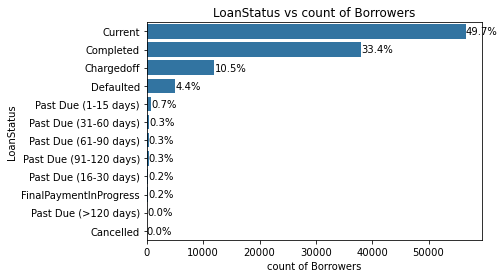

In [9]:
#plot bar chart to 'LoanStatus'
plt_variable('LoanStatus') 
plt.title('LoanStatus vs count of Borrowers');

In [10]:
# Group all Past Due loans under an unique status
pastdue_group = ['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)','Past Due (31-60 days)',
       'Past Due (91-120 days)',  'Past Due (>120 days)']
Loan_df.loc[Loan_df['LoanStatus'].isin(pastdue_group), 'LoanStatus'] = 'Past Due'
#ckeck the grouping we did
Loan_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
# Convert LoanStatus to a categorical variable
loan_status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status_dict)

Loan_df['LoanStatus'] = Loan_df['LoanStatus'].astype(ordered_loan_status)
#chech convert LoanStatus to a categorical variable
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  object  
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   object  
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           113932 non-null  category
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

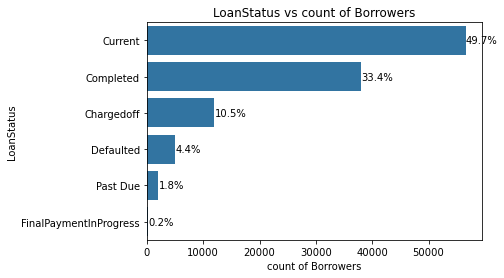

In [12]:
#plot bar chart to 'LoanStatus'
plt_variable('LoanStatus')  
plt.title('LoanStatus vs count of Borrowers');

almost 83% of all Prosper loans are either current or completed. Among them, almost 50% are active and being paid by Prosper's borrowers. However, about 10% of Prosper's loans were charged-off or defaulted.
Additionally, the remaining 1.81% of loans has the status Past Due and was grouped under a single status: Past Due.
During this analysis, we'll try to undercover which of the features listed above may contribute to 15% of charged-off and defaulted loans.

In [13]:
# create function for plot categoric variable in x axise 
def plt_variable_x(a,b,c):
    """
    function creat box plots for categorical variable 'a' in x axes ,xlabel(b) and ylabel(c)  with seaborn's PairGrid and calculat a proportion of each level count on the plot 
    """
    Status_counts = Loan_df[a].value_counts()
    base_color = sb.color_palette()[0]
    # Loan_Status = Loan_df[a].value_counts().index
    sb.countplot(data=Loan_df, x=a, color=base_color);
    plt.xlabel(b)
    plt.ylabel(c);

    # Returns the sum of all not-null values in `LoanStatus` column
    n_Loan = Loan_df[a].value_counts().sum()
    # Logic to print the proportion text on the bars
    for i in range (Status_counts.shape[0]):
       # Remember, type_Status contains the frequency of unique values in the `LoanStatus` column in decreasing order.
       count = Status_counts[i]
       # Convert count into a percentage, and then into string
       pct_string = '{:0.1f}%'.format(100*count/n_Loan )
       # Print the string value on the bar. 
       plt.text( i,count-8, pct_string, ha='center',);



Next up, I'll look predictors variable of interest: IncomeVerifiable

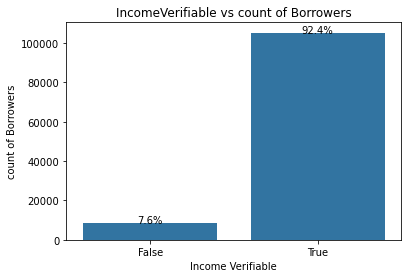

In [14]:
# Plot for IncomeVerifiable
plt_variable_x('IncomeVerifiable','Income Verifiable','count of Borrowers') 
plt.title('IncomeVerifiable vs count of Borrowers');

most of Borrowers are Income Verifiable.

Next , I'll look predictors variable of interest: IsBorrowerHomeowner

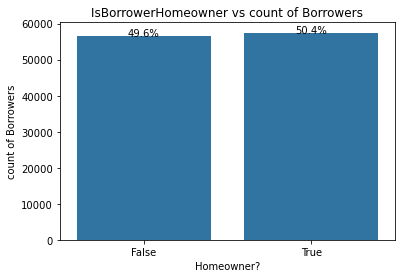

In [15]:
# Plot for IsBorrowerHomeowner
plt_variable_x('IsBorrowerHomeowner','Homeowner?','count of Borrowers') 
plt.title('IsBorrowerHomeowner vs count of Borrowers');

the count of Borrowers who has Home almost equal to Borrowers who has no Home.

Next , I'll look predictors variable of interest: EmploymentStatus

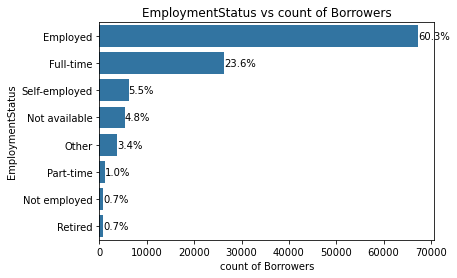

In [16]:
# Plot for EmploymentStatus
plt_variable('EmploymentStatus') 
plt.title('EmploymentStatus vs count of Borrowers');

the most Borrowers have Employed EmploymentStatus.

Next , I'll look predictors variable of interest: DebtToIncomeRatio

In [17]:
# create function for Plot histograme plot for continues variable
def plot_hist(a,b):
    """
    function creat histogram for  variable 'a'  ,xlabel(b) and ylabel(c)   
    """
    binsize = 0.02
    bins = np.arange(0, Loan_df[a].max()+binsize, binsize)

    plt.figure(figsize=[8, 5])
    plt.hist(data = Loan_df[Loan_df[a].notnull()], x = a, bins = bins)
    plt.xlabel(b)
    plt.ylabel('count of Borrowers')
    plt.xlim(0,1.5);

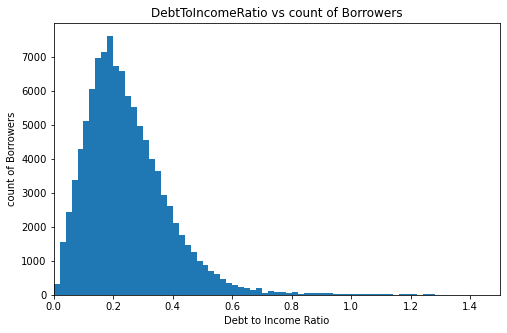

In [18]:
#Plot histograme plot for DebtToIncomeRatio
plot_hist('DebtToIncomeRatio','Debt to Income Ratio')
plt.title('DebtToIncomeRatio vs count of Borrowers');

the histograme shows that few borrowers have a debt to income ratio more than 1. And its majority follow between 0 and 0.4.

Next , I'll look predictors variable of interest: ProsperScore

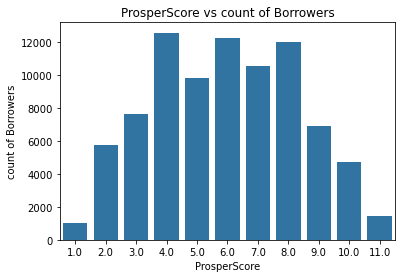

In [19]:
# Plot for ProsperScore

Status_counts = Loan_df['ProsperScore'].value_counts()
base_color = sb.color_palette()[0]
  # Loan_Status = Loan_df['ProsperScore'].value_counts().index
sb.countplot(data=Loan_df, x='ProsperScore', color=base_color);
plt.xlabel('ProsperScore')
plt.ylabel('count of Borrowers');
plt.title('ProsperScore vs count of Borrowers');

from the plot :most of the borrowers' risk scores are between 2 and 10 points

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> almost 83% of all Prosper loans are either current or completed. Among them, almost 50% are active and being paid by Prosper's borrowers. However, about 10% of Prosper's loans were charged-off or defaulted. Additionally, the remaining 1.81% of loans has the status Past Due and was grouped under a single status: Past Due.
most of the borrowers' risk scores are between 2 and 10 points.
few borrowers have a debt to income ratio more than 1. And its majority follow between 0 and 0.4.
the most Borrowers have Employed EmploymentStatus.
the count of Borrowers who has Home almost equal to Borrowers who has no Home.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Regarding loan status,I observed that there are different past due categories with very few loans, about 1.81%. So, I decided to consolidate all under a single category called Past Due.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

In [20]:
# Numberical vs Categorical features
numeric_vars = ['ProsperScore', 'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount']

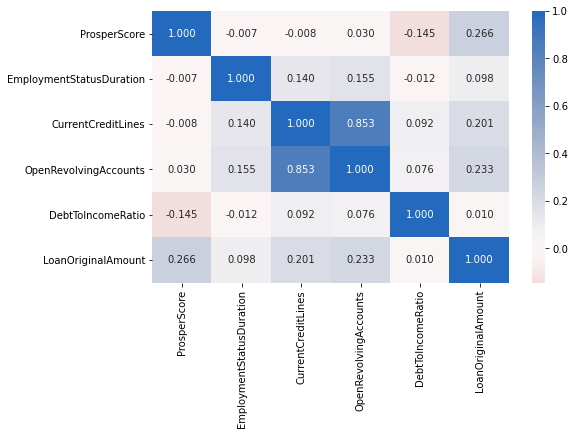

In [21]:
# Correlation plot
plt.figure(figsize = [8,5])
sb.heatmap(Loan_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

As can be seen from the correlation diagram above, CurrentCreditLines, OpenRevolvingAccounts are closely related.  the correlation value between them is 0.85, which is close to 1. This means that there is a strong positive correlation between them.

Let's move on to looking at how LoanStatus and ProsperScore are correlated .

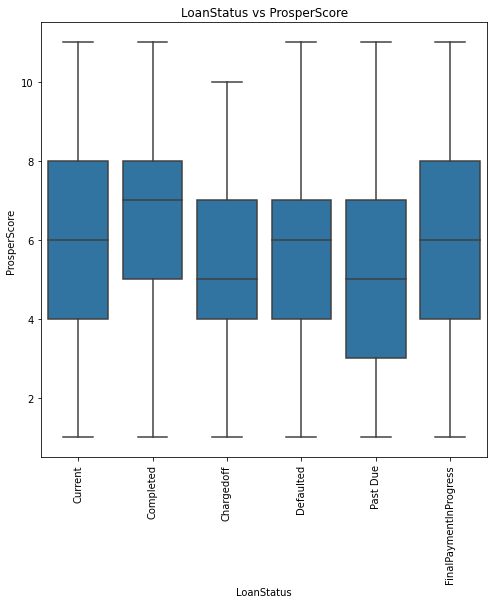

In [22]:
# LoanStatus vs ProsperScore
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[0]
Loan_Status = Loan_df['LoanStatus'].value_counts().index
ax2 = sb.boxplot(data=Loan_df, x='LoanStatus', y='ProsperScore', color = default_color, order=Loan_Status)
plt.ylabel('ProsperScore ')
plt.xticks(rotation=90);
plt.title('LoanStatus vs ProsperScore');

borrowers with higher prosper score completed their loans.
We can also observe that defaulted and past due loans have borrowers with lower median risk. Hence, Prosper should review its risk assessment procedure to make sure that it doesn't have any issues.

Let's move on to looking at how LoanStatus and EmploymentStatus are correlated .

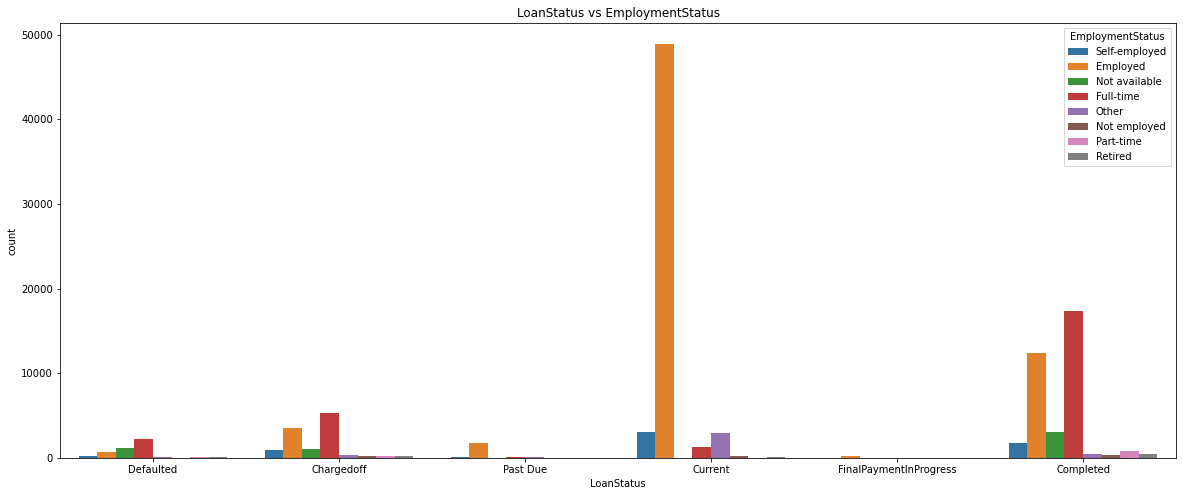

In [23]:
# LoanStatus vs EmploymentStatus
plt.figure(figsize = [20, 8])

sb.countplot(data = Loan_df, x = 'LoanStatus', hue = 'EmploymentStatus');
plt.title('LoanStatus vs EmploymentStatus');

borrowers how are  full-time jobs have most of the defaulted and charged-off loans.

Let's move on to looking at how LoanStatus and IsBorrowerHomeowner are correlated .

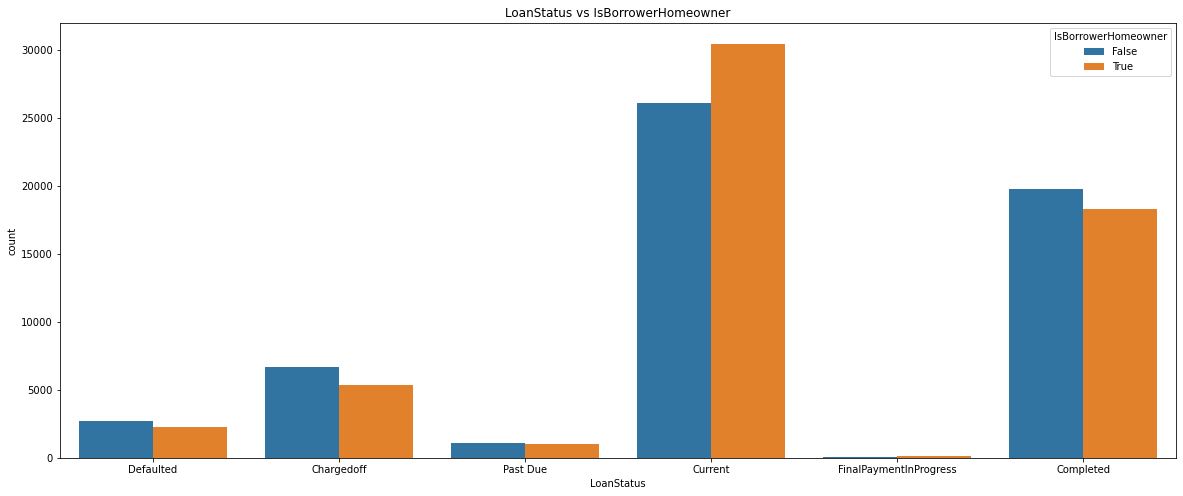

In [24]:
# LoanStatus vs IsBorrowerHomeowner
plt.figure(figsize = [20, 8])

sb.countplot(data = Loan_df, x = 'LoanStatus', hue = 'IsBorrowerHomeowner');
plt.title('LoanStatus vs IsBorrowerHomeowner');

 borrowers who do not have home have most of the defaulted and charged-off loans.

Let's move on to looking at how LoanStatus and IncomeVerifiable are correlated .

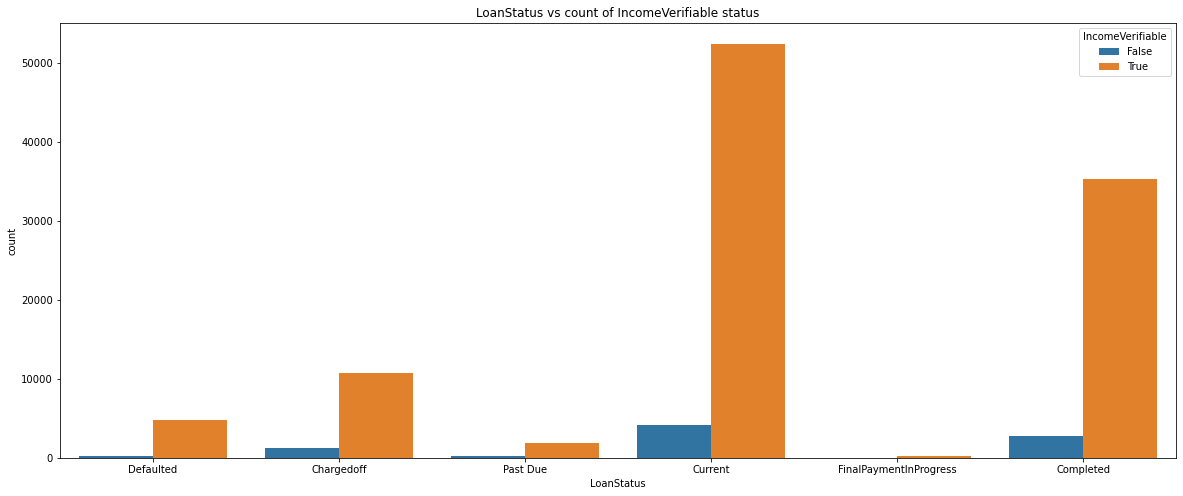

In [25]:
# LoanStatus vs IncomeVerifiable
plt.figure(figsize = [20, 8])
sb.countplot(data = Loan_df, x = 'LoanStatus', hue = 'IncomeVerifiable');
plt.title('LoanStatus vs count of IncomeVerifiable status');


borrowers who are IncomeVerifiable have most of the borrowers for all loan status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

borrowers who do not have home have most of the defaulted and charged-off loans.
borrowers how are  full-time jobs have most of the defaulted and charged-off loans
borrowers with higher prosper score completed their loans

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

there is a strong relation between CurrentCreditLines and OpenRevolvingAccounts

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

The main thing I want to explore in this part of the analysis is how the IsBorrowerHomeowner  play into the relationship between LoanStatus and ProsperScore

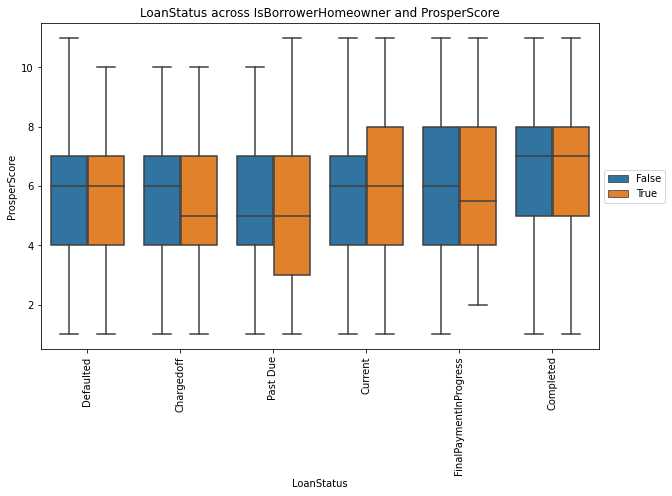

In [26]:
#plot  how the IsBorrowerHomeowner  play into the relationship between LoanStatus and ProsperScore
plt.figure(figsize = [10, 6])
sb.boxplot(data = Loan_df, x = 'LoanStatus', y = 'ProsperScore', hue = 'IsBorrowerHomeowner')
plt.title('LoanStatus across IsBorrowerHomeowner and ProsperScore')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 90);

In this plot, it was noticed that all Loan statuses have the same range of prosper score for Borrowers who have home and Borrowers who have no home  except past due and current  
the most  Borrowers in Past Due status  has prosper score lower than other Loanstatus

NEXT,I want to explore in this part of the analysis is how the IncomeVerifiable play into the relationship between LoanStatus and ProsperScore

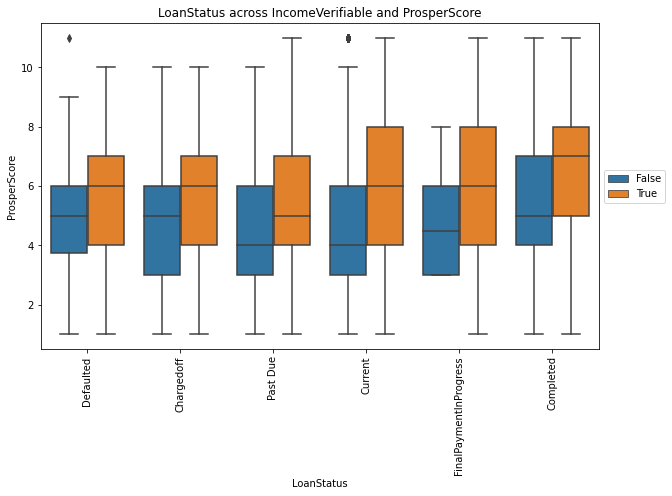

In [27]:
#plot  how the IncomeVerifiable  play into the relationship between LoanStatus and ProsperScore
plt.figure(figsize = [10, 6])
sb.boxplot(data = Loan_df, x = 'LoanStatus', y = 'ProsperScore', hue = 'IncomeVerifiable')
plt.title('LoanStatus across IncomeVerifiable and ProsperScore');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 90);

In this plot, it was noticed that all Loan statuses have  range of prosper score for Borrowers who IncomeVerifiable higher than  Borrowers who are not IncomeVerifiable
the range of prosper score for Borrowers who are not IncomeVerifiable between 4 and 7.but the range of prosper score for Borrowers who are not IncomeVerifiable between 3 and 6.
that is unexpected

NEXT,I want to explore in this part of the analysis is how the LoanOriginalAmount play into the relationship between LoanStatus and ProsperScore

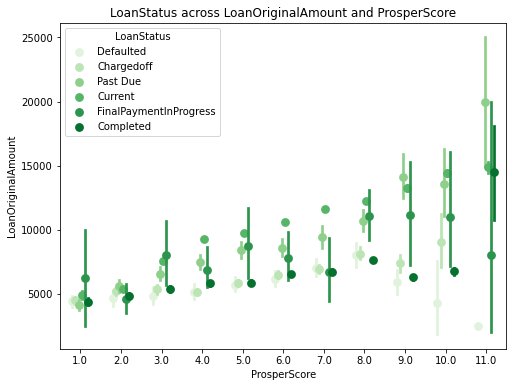

In [28]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = Loan_df, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'LoanStatus',
          palette = 'Greens', linestyles = '', dodge = 0.4);
plt.title('LoanStatus across LoanOriginalAmount and ProsperScore');


from the plot we see that LoanOriginalAmount has no effect the relation between  LoanStatus and ProsperScore

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of Loan status against Prosper score by looking at the impact of the IsBorrowerHomeowner. The multivariate exploration showed that all Loan statuses have the same range of prosper score for Borrowers who have home and Borrowers who have no home  except past due and current  
the most  Borrowers in Past Due status  has prosper score lower than other Loanstatus.
also all Loan statuses have range of prosper score for Borrowers who IncomeVerifiable higher than  Borrowers who are not IncomeVerifiable.

### Were there any interesting or surprising interactions between features?
Surprisingly,borrowers with higher prosper score completed their loans. We can also observe that defaulted and past due loans have borrowers with lower median risk. Hence, Prosper should review its risk assessment procedure to make sure that it doesn't have any issues.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [29]:
#!jupyter nbconvert ****.ipynb --to slides --no-input
#jupyter nbconvert exploration_template.ipynb --to slides --template output-toggle.tpl
#--post serve